# A look at the 2021 Panthers

The Carolina Panthers came into the 2021 season hopeful that this would be the year they would begin to make the turn from rebuild to contenders. Matt Rhule put all his faith into Sam Darnold who they recived in a trade with the Jets before the season began. Sam started the season off hott leading the panthers to a 3-0 start and they kinda fell apart. For what its worth lets look at the first 3 games and see went right for the team before their season derailed.

In [1]:
import pandas as pd
import numpy as np
import nflfastpy as nfl
from scipy import stats
from matplotlib import pyplot as plt

c:\Users\jacotayl\AppData\Local\Programs\Python\Python39\lib\site-packages\nflfastpy\__init__.py:16: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  default_headshot = mpl_image.imread(headshot_url)


In [2]:
pbp2021_df = nfl.load_pbp_data(year=2021)
panthers_2021 = pbp2021_df.loc[(pbp2021_df['home_team'] == 'CAR') | (pbp2021_df['away_team'] == 'CAR')]


Lot of data to go through but a quick look at the Week 1 box score will show us that Darnold threw for 279 yards on 24/35 and one passing TD and a 102.

In [23]:
# panthers passing plays
passing_plays = panthers_2021.loc[panthers_2021['posteam'] == 'CAR', ['week', 'receiver_player_id', 'receiver_player_name', 'receiver_jersey_number',
                                              'air_yards', 'complete_pass', 'yards_gained', 'pass_touchdown']]
panthers_passing_plays = passing_plays.dropna()

In [54]:
# Function to make a graph for any week that shows air yards
def airyards(df, week):
    df = df.loc[df['week'] == week]
    plt.tick_params(axis='x', labelsize=8)
    plt.title(f'Week {week} Air Yards')
    plt.plot(df['receiver_player_name'], df['air_yards'], 'ro')
    plt.xticks(rotation=90)
    plt.show()

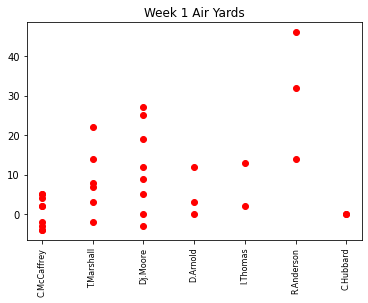

In [55]:
airyards(panthers_passing_plays, 1)

Nothing really surprising here. McCaffrey of has the lowest avg air yards due to the dump offs, screens, and such. Interesting to note Robbie Anderson only getting 3 passes thrown his way after a great 2020 season and this trend would contiue for the rest of the year. DJ Moore recieved a mix of short, mid, and long range passes as a player of his speed. Terrace Marshall in his debut also recieved a surprising number of looks. While Ian Thomas continued to dissapoint and still shows no signs of replicating the numbers Greg Olsen put up or coming anywhere close to them.

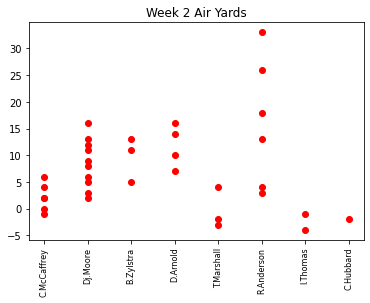

In [56]:
#week 2
airyards(panthers_passing_plays, 2)

This game was a 26-7 victory agains the New Orleans Saints.The story of this game was Carolina's defense who held Jameis Winston to a 111 yards and 2 ints on a 50% (11/22) completion rate. They also dominated the run game allowing only 48 yards on 17 attempts. Now for Darnold who had another fantastic game. Darnold thre for 305 yards, went 26/38, 2 tds and 1 interception. Looking at his passes Robbie Anderson seemed to be Darnolds prefered target on deepballs as he was the only reciever with a pass over 20 air yards. DJ Moore continued to receiver a mix of short and medium passes. While Dan Arnold appeared to take over as the pass catching tight end and would continue so until they traded him to Jacksonville.

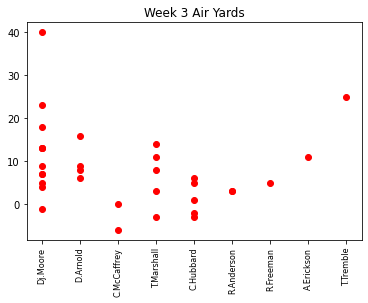

In [57]:
# week 3
airyards(panthers_passing_plays, 3)

Onto week 3, a Thurdsay night primetime game against the Houston Texans. The Panthers defense once again played an excellent game holding the texans to 42 rush yards on 17 rushes and rookie qb Davis Mills appearing in his 2nd game to only 168 yards. DJ moore had a fantasic game with 8 receptions for 126 yards. McCaffery got hurt this game which is why he only had 2 passes thrown his way. While Anderson who played the full game only got 1 target. From here the panthers season fell apart. Hampered by McCaffrey's injury the panthers would only go on to win 2 more games the rest of the season. But was it all Darnolds fault?

# Panthers and the 3rd Quarter

From memory the panthers were at their worse in 2 situations. Opening drives and the 3rd quarter. How bad were they though?

In [60]:
third_quarter = panthers_2021.loc[(panthers_2021['drive_quarter_start'] == 3) & (panthers_2021['drive_quarter_end'] == 3)]